In [1]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [7]:
X = df.iloc[:, 0:3]
y = df.iloc[: ,-1]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test , y_pred)

0.957009966498703

In [34]:
import matplotlib.pyplot as plt

## Linear Relationship]

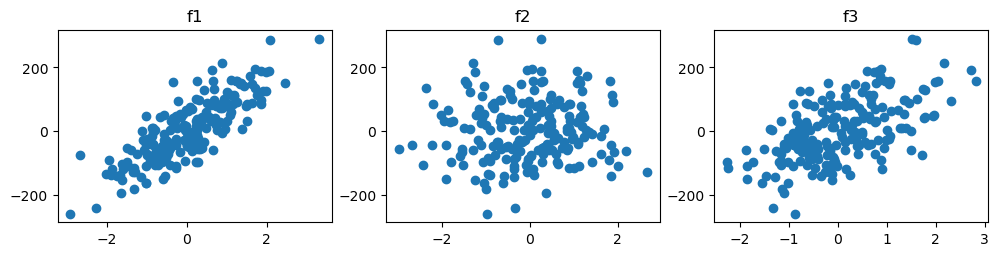

In [44]:
fig, (ax1 , ax2 , ax3) = plt.subplots(ncols = 3, figsize=(12 , 2.5))
ax1.set_title("f1")
ax2.set_title("f2")
ax3.set_title("f3")
ax1.scatter(df['feature1'] , df['target'])
ax2.scatter(df['feature2'] , df['target'])
ax3.scatter(df['feature3'] , df['target'])

## Multicollinearity

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train ,i))

In [61]:
pd.DataFrame({'vif': vif} , index = df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.00195,1.011273,1.011211


<Axes: >

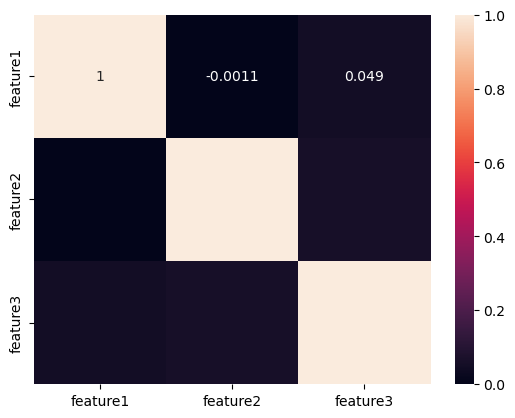

In [65]:
# another technique
import seaborn as sns
sns.heatmap(df.iloc[: , 0:3].corr() , annot = True)

## Normality of Residual

In [67]:
residual = y_test - y_pred

C:\Users\vicky\AppData\Local\Temp\ipykernel_41440\4264818608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual  , hist= False)
C:\Users\vicky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='target', ylabel='Density'>

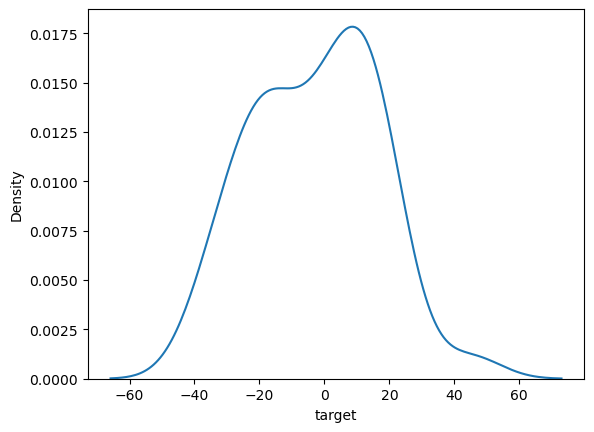

In [81]:
sns.distplot(residual  , hist= False)